In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import multivariate_normal, norm
import numpy as np
from sklearn.cluster import KMeans

<b> Question 1a </b>

In [3]:
iris = datasets.load_iris()
X = iris.data[:,2]
y = iris.target

In [7]:
weightFactors = [50/150.0,100/150.0]
meanList = [1.35 , 5.0] #  Initialization, [red,green,blue]
sigmaList = [.25 , 1.0]     #  Initialization, [red,green,blue]

In [8]:
numSteps = 10   #  How many times we loop through the EM algorithm
clusters = 2

for i in range(numSteps):
    probSums = []
    for k in range(len(X)):
        temp = 0
        for j in range(clusters):
            temp += weightFactors[j]*norm.pdf(X[k],meanList[j],sigmaList[j])   #  Calculate the denominator in E-step
        probSums.append(temp)
    probSums=np.array(probSums)
    
    for j in range(clusters):
        E = []
        for k in range(len(X)):
            E.append(weightFactors[j]*norm.pdf(X[k],meanList[j],sigmaList[j])) # get expectations
        E = np.array(E)
        
        E = np.divide(E,probSums)
        
        meanList[j] = np.dot(E,X)/np.sum(E) # update means and sigma and weights
        sigmaList[j] = np.sqrt(np.dot(E,(X-meanList[j])**2)/np.sum(E))
        weightFactors[j] = np.sum(E)/len(X)
        
        #if sigmaList[j]<0.1: #  It's great with this awful without for whatever reason
            #sigmaList[j] = 0.15



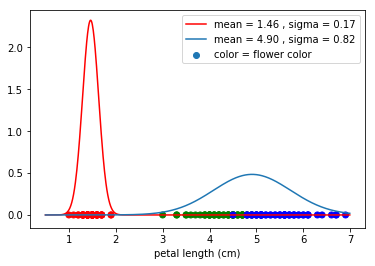

In [9]:
#  Plot our two distribution , and the color labeled data
xTest = np.arange(0.5,7,0.01) #  For distribution plotting
plt.plot(xTest,norm.pdf(xTest,meanList[0],sigmaList[0]),c='red',label='mean = %.2f , sigma = %.2f'%(meanList[0],sigmaList[0]))
plt.plot(xTest,norm.pdf(xTest,meanList[1],sigmaList[1]),label='mean = %.2f , sigma = %.2f'%(meanList[1],sigmaList[1]))
plt.scatter(X,[0]*len(X),c=y,cmap=matplotlib.colors.ListedColormap(['red','green','blue']),label='color = flower color')
plt.xlabel(iris.feature_names[2])
plt.legend()

If we choose the 2nd dimension , e.g. the petal length of each flower in the iris data set we can cluster our data into two separate distributions. This leaves us with the green and blue flowers grouped together, and the red flower separate. I am unsure why the distribution for red wants to be so far to the left.

In [10]:
X = iris.data[:,3]
weightFactors = [50/150,50/150,50/150]
meanList = [0.22 , 1.33 ,  2.02] #  Initialization, [red,green,blue]
sigmaList = [.15 , .25 , .5]     #  Initialization, [red,green,blue]

In [11]:
numSteps = 3   #  How many times we loop through the EM algorithm
clusters = 3

for i in range(numSteps):
    probSums = []
    for k in range(len(X)):
        temp = 0
        for j in range(clusters):
            temp += weightFactors[j]*norm.pdf(X[k],meanList[j],sigmaList[j])   #  Calculate the denominator in E-step
        probSums.append(temp)
    probSums=np.array(probSums)
    
    for j in range(clusters):
        E = []
        for k in range(len(X)):
            E.append(weightFactors[j]*norm.pdf(X[k],meanList[j],sigmaList[j]))
        E = np.array(E)
        E /= probSums
        
        meanList[j] = np.dot(E,X)/np.sum(E)
        sigmaList[j] = np.sqrt(np.dot(E,(X-meanList[j])**2)/np.sum(E))
        weightFactors[j] = np.sum(E)/len(X)
        
        if sigmaList[j]<0.1:
            sigmaList[j] = 0.15



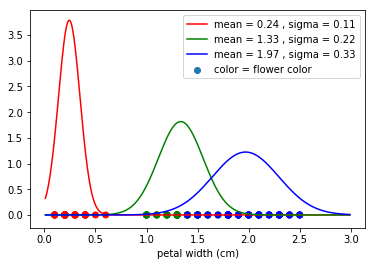

In [12]:
#  Plot our 3 distribution , and the color labeled data
xTest = np.arange(.01,3,0.01) #  For distribution plotting
plt.plot(xTest,norm.pdf(xTest,meanList[0],sigmaList[0]),c='red',label='mean = %.2f , sigma = %.2f'%(meanList[0],sigmaList[0]))
plt.plot(xTest,norm.pdf(xTest,meanList[1],sigmaList[1]),c='green',label='mean = %.2f , sigma = %.2f'%(meanList[1],sigmaList[1]))
plt.plot(xTest,norm.pdf(xTest,meanList[2],sigmaList[2]),c='blue',label='mean = %.2f , sigma = %.2f'%(meanList[2],sigmaList[2]))
plt.scatter(X,[0]*len(X),c=y,cmap=matplotlib.colors.ListedColormap(['red','green','blue']),label='color = flower color')
plt.xlabel(iris.feature_names[3])
plt.legend()

If we choose the 3rd feature e.g. the petal width, we can separate the data into three clusters. However the green and blue data are still difficult to differentiate between because of the large overlap region of the green and blue PDF's. This is consistent with the scatter plots linked with the assignment.

<b> Question 1b </b>

In [13]:
X = iris.data
y = iris.target

In [14]:
meanList = np.array([[5,3.5,1.5,.2],[6,2.6,4.25,1.25],[8,3,5.75,2]])
covList = np.array([np.eye(4),np.eye(4),np.eye(4)])
numSteps = 20  #  How many times we loop through the EM algorithm
clusters = 3
for i in range(numSteps):
    probSums = []
    E = []
    for k in range(len(X)):
        temp = 0
        for j in range(clusters):
            temp += multivariate_normal.pdf(X[k],meanList[j],covList[j],allow_singular=True)   #  Calculate the denominator in E-step
        probSums.append(temp)
    probSums = np.array(probSums)      
    tempMeanList = np.copy(meanList)
    tempCovList = np.copy(covList)
    for j in range(clusters):
        E = []
        for k in range(len(X)):
            E.append(multivariate_normal.pdf(X[k],tempMeanList[j],tempCovList[j],allow_singular=True))  #  Calculate the expectations
        E = np.array(E)
        E /= probSums
        meanList[j] = np.dot(E,X)/np.sum(E)                                               #  Perform the mean maximization e.g. update them
        covList[j] = np.matmul( E*np.transpose(X-tempMeanList[j]) , (X-tempMeanList[j]) )  / np.sum(E)   #  Perform the covariance maximization e.g. update them


Text(0.5,1,'Contour Color corresponds to data color')

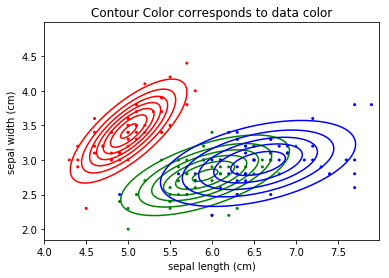

In [17]:
plt.scatter(X[:,0],X[:,1], s=4, c=y , cmap=matplotlib.colors.ListedColormap(['red','green','blue']),label='color = flower color')
xTest, yTest = np.mgrid[4:8:.01,2:5:.01]
pos = np.dstack((xTest,yTest))

rv0 = multivariate_normal(meanList[0][:2],covList[0][:2,:2]) # Get the red contour
rv1 = multivariate_normal(meanList[1][:2],covList[1][:2,:2]) # Get the green contour
rv2 = multivariate_normal(meanList[2][:2],covList[2][:2,:2]) # Get the blue contour

plt.contour(xTest,yTest,rv0.pdf(pos),colors='r')
plt.contour(xTest,yTest,rv1.pdf(pos),colors='g')
plt.contour(xTest,yTest,rv2.pdf(pos),colors='b')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Contour Color corresponds to data color')



In [14]:
print('The distribution order for flower colors is red, green, blue respectively')
print('\nAnd the features are in the same order as iris e.g.\n',iris.feature_names)
print('\nThe means of each component of each distribution are\n',meanList)
print('\nThe covariance matrices for each color are\n',covList)

The distribution order for flower colors is red, green, blue respectively

And the features are in the same order as iris e.g.
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

The means of each component of each distribution are
 [[5.006      3.418      1.464      0.244     ]
 [5.91756839 2.77847682 4.20768235 1.29937784]
 [6.5483552  2.94975375 5.48657069 1.98911794]]

The covariance matrices for each color are
 [[[0.121764   0.098292   0.015816   0.010336  ]
  [0.098292   0.142276   0.011448   0.011208  ]
  [0.015816   0.011448   0.029504   0.005584  ]
  [0.010336   0.011208   0.005584   0.011264  ]]

 [[0.27539965 0.09633568 0.18552236 0.05481323]
  [0.09633568 0.09242353 0.09099463 0.04302062]
  [0.18552236 0.09099463 0.20317612 0.06204714]
  [0.05481323 0.04302062 0.06204714 0.03251001]]

 [[0.38697967 0.0923423  0.30152004 0.05999068]
  [0.0923423  0.11059214 0.08380931 0.05570039]
  [0.30152004 0.08380931 0.32435003 0.07146248]
  [0.05999068 0

<b> Question 2 </b>

The K-means algorithm has a few key assumptions.
1: It assumes that the distribution that the data is drawn from is spherical, since it clusters data based on distance from a mean, hence any point on a sphere is equally far away and hence equally as available to be part of the cluster.
2: It also assumes that each variable has the same variance. e.g. clusters are of similar size

In [15]:
a = np.array([[-.2,0],[0,0]])
b = np.array([[-0.1,.1],[.1,-0.1]])
temp = np.random.multivariate_normal([5,5],a,size=100)
temp2 = np.random.multivariate_normal([5,5],b,size=1000)
allData = np.concatenate((temp,temp2),axis=0)

C:\Users\Nic\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nic\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


Text(0.5,1,'SKlearns KMeans guess')

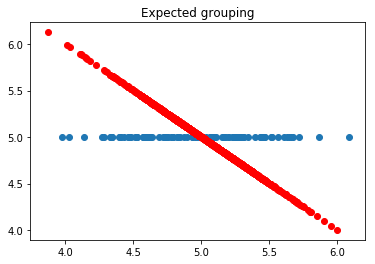

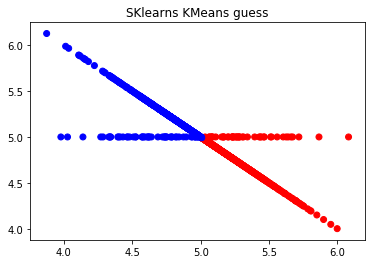

In [16]:
plt.scatter(temp[:,0],temp[:,1])
plt.scatter(temp2[:,0],temp2[:,1],color='r')
plt.title('Expected grouping')

plt.figure()
kmeans = KMeans(n_clusters=2, random_state=0).fit(allData)
labels = kmeans.labels_
plt.scatter(allData[:,0],allData[:,1], c=labels ,cmap=matplotlib.colors.ListedColormap(['red','blue']))
plt.title('SKlearns KMeans guess')

If the clusters are not spherically distributed the Kmeans will assume that they are spherically distributed and cluster based on distance which is what happens in the above case when clearly the two clusters fall on different lines rather than in spherical clusters.

In [17]:
a = np.array([[.5,0],[0,.5]])
b = np.array([[7,.5],[.5,7]])
temp = np.random.multivariate_normal([15,15],a,size=50)
temp2 = np.random.multivariate_normal([7,7],b,size=1000)
allData = np.concatenate((temp,temp2),axis=0)

Text(0.5,1,'SKlearns KMeans guess')

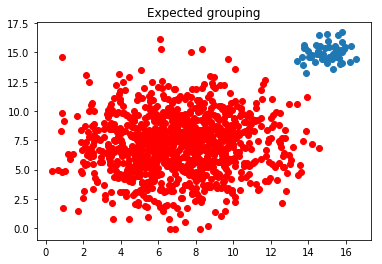

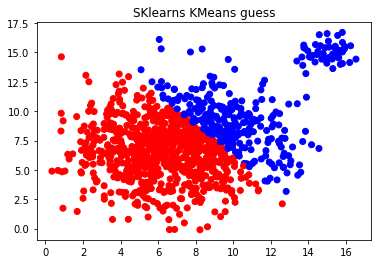

In [18]:
plt.scatter(temp[:,0],temp[:,1])
plt.scatter(temp2[:,0],temp2[:,1],color='r')
plt.title('Expected grouping')

plt.figure()
kmeans = KMeans(n_clusters=2, random_state=0).fit(allData)
labels = kmeans.labels_
plt.scatter(allData[:,0],allData[:,1], c=labels ,cmap=matplotlib.colors.ListedColormap(['red','blue']))
plt.title('SKlearns KMeans guess')

The above images describe the effect of cluster size. Initially the blue cluster only has 50 points where as the red one has 1000. As a result KMeans determines the regional means incorrectly, and then using it's spherical assumption it will split the data in two almost down the middle because it wants both clusters to have roughly the same amount of points. Causing for a gruesome missclassification of the data.